In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [6]:
df.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
# Drop rows with minus quantity and price

df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530105 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      530105 non-null  object        
 1   StockCode    530105 non-null  object        
 2   Description  530105 non-null  object        
 3   Quantity     530105 non-null  int64         
 4   InvoiceDate  530105 non-null  datetime64[ns]
 5   Price        530105 non-null  float64       
 6   Customer ID  397885 non-null  float64       
 7   Country      530105 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [9]:
# Drop na Customers ID

cleaned_df = df.dropna(subset=['Customer ID'])

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397885 non-null  object        
 1   StockCode    397885 non-null  object        
 2   Description  397885 non-null  object        
 3   Quantity     397885 non-null  int64         
 4   InvoiceDate  397885 non-null  datetime64[ns]
 5   Price        397885 non-null  float64       
 6   Customer ID  397885 non-null  float64       
 7   Country      397885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [11]:
# create a new column with the total sales

cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


C:\Users\user\AppData\Local\Temp\ipykernel_8384\3429193859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


In [12]:
# Group by customer ID in order to create RFM features

agg_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

In [13]:
agg_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1797.24,4,2011-09-25 13:13:00
3,12349.0,1757.55,1,2011-11-21 09:51:00
4,12350.0,334.40,1,2011-02-02 16:01:00


In [14]:
max_invoice_date = agg_df["LastInvoiceDate"].max()

agg_df["Recency"] = (max_invoice_date - agg_df["LastInvoiceDate"]).dt.days

agg_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1797.24,4,2011-09-25 13:13:00,74
3,12349.0,1757.55,1,2011-11-21 09:51:00,18
4,12350.0,334.40,1,2011-02-02 16:01:00,309


In [15]:

agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      4338 non-null   float64       
 1   MonetaryValue    4338 non-null   float64       
 2   Frequency        4338 non-null   int64         
 3   LastInvoiceDate  4338 non-null   datetime64[ns]
 4   Recency          4338 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 169.6 KB


### plot the outliers

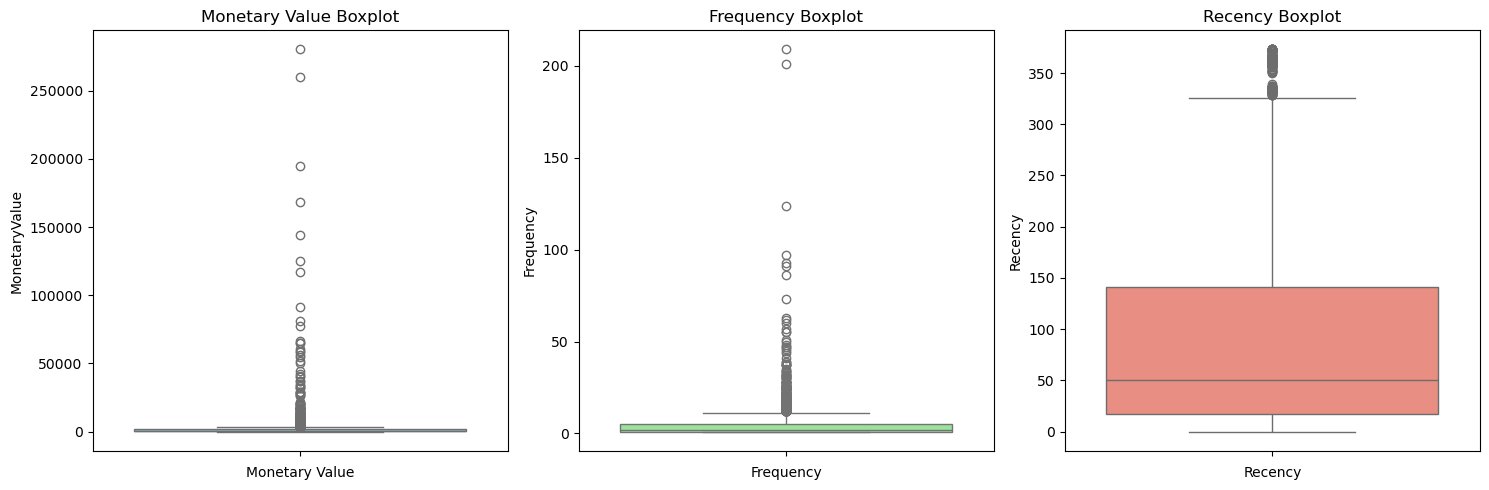

In [16]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=agg_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=agg_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=agg_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### From the above we must remove the outliers from Monetary and Frequencey columns

In [17]:
# removing the outliers 

M_Q1 = agg_df["MonetaryValue"].quantile(0.25)
M_Q3 = agg_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

mon_out = (agg_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR)) | (agg_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR))

F_Q1 = agg_df['Frequency'].quantile(0.25)
F_Q3 = agg_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

freq_out = (agg_df["Frequency"] < (M_Q1 - 1.5 * M_IQR)) | (agg_df["Frequency"] > (M_Q3 + 1.5 * M_IQR))

non_outliers_df = agg_df[~(mon_out | freq_out)]

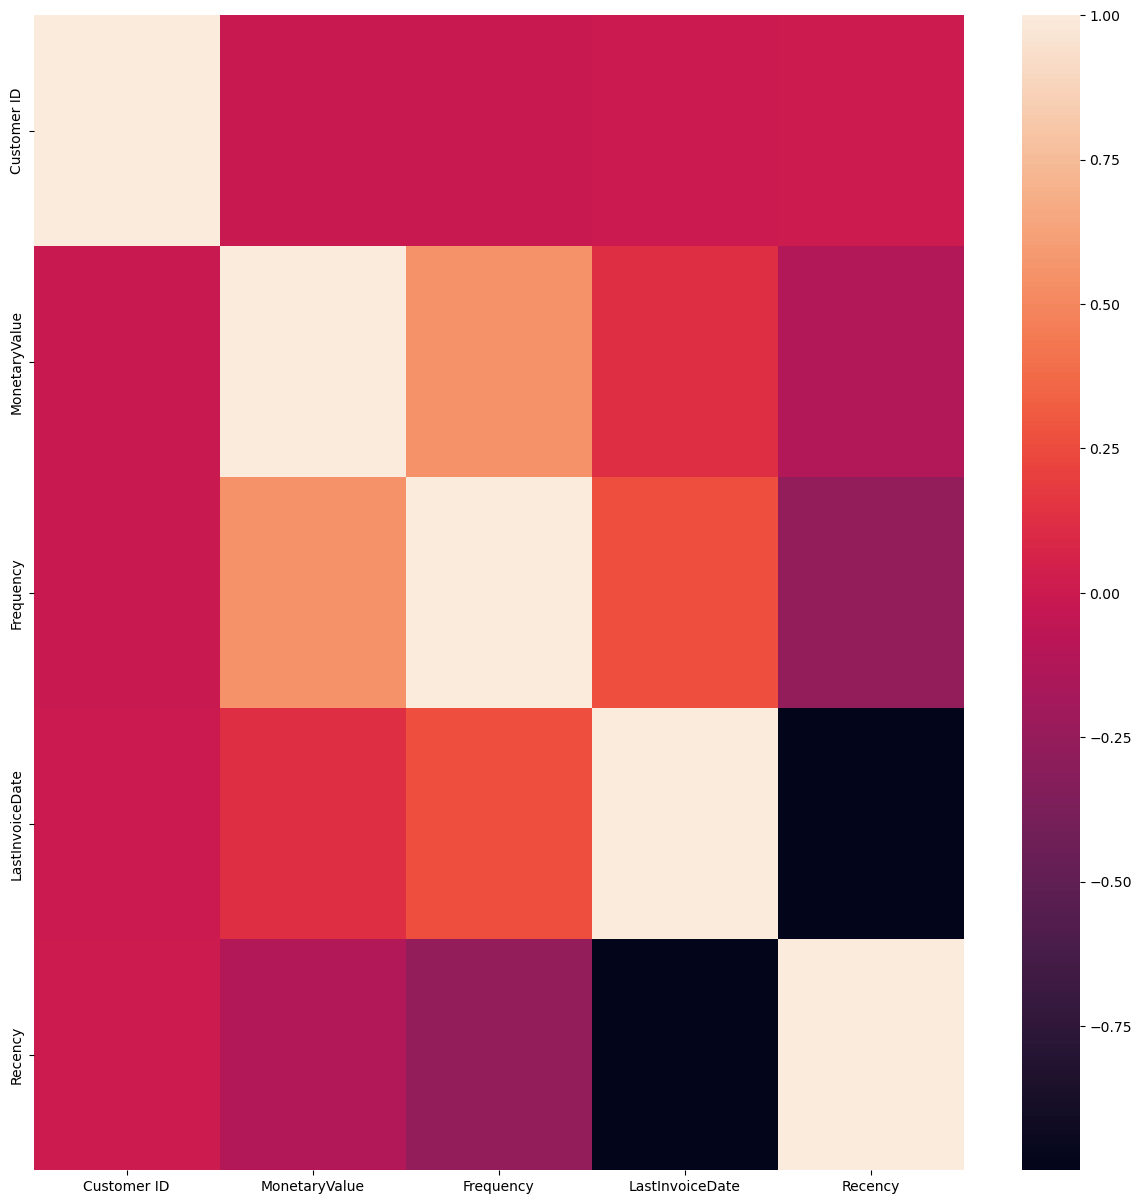

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(agg_df.corr())
plt.show()

In [20]:
non_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3911 entries, 2 to 4337
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      3911 non-null   float64       
 1   MonetaryValue    3911 non-null   float64       
 2   Frequency        3911 non-null   int64         
 3   LastInvoiceDate  3911 non-null   datetime64[ns]
 4   Recency          3911 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 183.3 KB


In [21]:
non_outliers_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
2,12348.0,1797.24,4,2011-09-25 13:13:00,74
3,12349.0,1757.55,1,2011-11-21 09:51:00,18
4,12350.0,334.40,1,2011-02-02 16:01:00,309
5,12352.0,2506.04,8,2011-11-03 14:37:00,35
6,12353.0,89.00,1,2011-05-19 17:47:00,203


In [22]:
non_outliers_df.to_csv('RFM_features.csv', index=False)
cleaned_df.to_csv('cleaned_data.csv',index=False)